<h1 align="center">Volume 1: Facial Recognition.</h1>

    <Sophie Gee> (double-click to edit)
    <Section 3>
    <11/16/21>

In [1]:
import os
import numpy as np
from imageio import imread
from matplotlib import pyplot as plt
from scipy import linalg as la 

### Helper Functions

In [2]:
def get_faces(path="./faces94"):
    """Traverse the specified directory to obtain one image per subdirectory. 
    Flatten and convert each image to grayscale.
    
    Parameters:
        path (str): The directory containing the dataset of images.  
    
    Returns:
        ((mn,k) ndarray) An array containing one column vector per
            subdirectory. k is the number of people, and each original
            image is mxn.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)


def sample_faces(k, path="./faces94"):
    """Generate k sample images from the given path.

    Parameters:
        n (int): The number of sample images to obtain. 
        path(str): The directory containing the dataset of images.  
    
    Yields:
        ((mn,) ndarray): An flattend mn-array representing a single
        image. k images are yielded in total.
    """
    files = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, k, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, as_gray=True))

### Problem 1 

- Implement `show()`.
- Use `show()` to display a face from the `faces94` dataset.

In [3]:
def show(image, m=200, n=180):
    """Plot the flattened grayscale 'image' of width 'w' and height 'h'.
    
    Parameters:
        image ((mn,) ndarray): A flattened image.
        m (int): The original number of rows in the image.
        n (int): The original number of columns in the image.
    """
    #reshape the image to (m,n) size
    new_image = np.reshape(image, (m,n))
    
    #show the image
    plt.imshow(new_image, cmap="gray")
    plt.axis("off")
    plt.show()
    

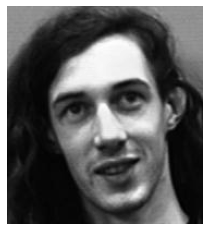

In [4]:
samples = sample_faces(10)
show(next(samples))

In [5]:
class FacialRec(object):
    """Class for storing a database of face images, with methods for
    matching other faces to the database.
    
    Attributes:
        F ((mn,k) ndarray): The flatten images of the dataset, where
            k is the number of people, and each original image is mxn.
        mu ((mn,) ndarray): The mean of all flatten images.
        Fbar ((mn,k) ndarray): The images shifted by the mean.
        U ((mn,k) ndarray): The U in the compact SVD of Fbar;
            the columns are the eigenfaces.
    """
    # Problems 2-3
    def __init__(self, path='./faces94'):
        """Initialize the F, mu, Fbar, and U attributes.
        This is the main part of the computation.
        """
        
        #construct F, mean face, shifted faces Fbar, and compact U of svd
        self.F = get_faces(path)
        self.mean = self.F.mean(axis=1)
        self.shifted = (self.F-np.vstack(self.mean))
        U, s, V = np.linalg.svd(self.shifted, full_matrices=False)
        self.U = U

    # Problem 3
    def project(self, A, s):
        """Project a face vector onto the subspace spanned by the first s
        eigenfaces, and represent that projection in terms of those eigenfaces.
        
        Parameters:
            A((mn,) or (mn,l) ndarray): The array to be projected. 
            s(int): the number of eigenfaces.
        Returns: 
            ((s,) ndarray): An array of the projected image of s eigenfaces.
        """
        
        #return the projection
        
        return self.U[:,:s].T@A
        
        

    # Problem 5
    def find_nearest(self, g, s=38):
        """Find the index j such that the jth column of F is the face that is
        closest to the face image 'g'.
        
        Parameters:
            g ((mn,) ndarray): A flattened face image.
            s (int): the number of eigenfaces to use in the projection.

        Returns:
            (int): the index of the column of F that is the best match to
                   the input face image 'g'.
        """
        #construct g hat
        g_bar = (g-self.mean)
        g_hat = self.project(g_bar, s)
        
        #retrieve f hat
        f_hat = self.project(image.shifted, s)
        
        norm = la.norm(f_hat-np.vstack(g_hat), axis=0)
        index = np.argmin(norm)
        
        return index
        

    # Problem 6
    def match(self, image, s=38, m=200, n=180):
        """Display an image along with its closest match from the dataset. 
        
        Parameters:
            image ((mn,) ndarray): A flattened face image.
            s (int): The number of eigenfaces to use in the projection.
            m (int): The original number of rows in the image.
            n (int): The original number of columns in the image.
        """
        plt.subplot(121)
        plt.title("Origin g Image")
        show(image, m,n)
        
        ind_of_closest = self.find_nearest(image, s)
        plt.subplot(122)
        plt.title("Closest to g in Set")
        show(self.F[:,ind_of_closest])
        

### Problem 2

- In `FacialRec.__init__()`, compute $F$, the mean face $\boldsymbol{\mu}$, and the mean-shifted faces $\bar{F}$.
Store each as an attribute.

- Initialize a `FacialRec` object and display its mean face, plus an original image and its shifted face.

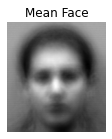

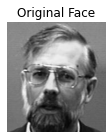

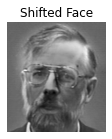

In [6]:
#plot the mean, original, and shifted faces
plt.subplot(131)
image = FacialRec()
plt.title("Mean Face")
show(image.mean)

plt.subplot(132)
plt.title("Original Face")
show(image.F[:,10])

plt.subplot(133)
plt.title("Shifted Face")
show(image.shifted[:,10])


### Problem 3

- In `FacialRec.__init__()`, compute the compact SVD of $\bar{F}$ and store the $U$ as an attribute.
- Use `show()` to display some of the eigenfaces (the columns of $U$).
- Implement `FacialRec.project()` (in a single line).


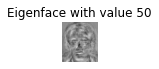

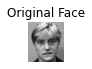

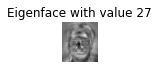

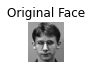

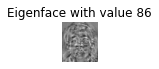

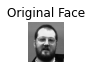

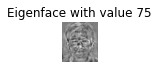

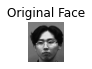

In [7]:
#plot the eigenface at 50, and the original at 50
plt.subplot(181)
image = FacialRec()
plt.title("Eigenface with value 50")
show(image.U[:,50])

plt.subplot(182)
plt.title("Original Face")
show(image.F[:,50])

plt.subplot(183)
plt.title("Eigenface with value 27")
show(image.U[:,27])

plt.subplot(184)
plt.title("Original Face")
show(image.F[:,27])

plt.subplot(185)
plt.title("Eigenface with value 86")
show(image.U[:,86])

plt.subplot(186)
plt.title("Original Face")
show(image.F[:,86])

plt.subplot(187)
plt.title("Eigenface with value 75")
show(image.U[:,75])

plt.subplot(188)
plt.title("Original Face")
show(image.F[:,75])

### Problem 4

- Select one of the shifted images $\bar{\mathbf{f}}_i$.
- For at least 4 values of $s$, use `FacialRec.project()` to compute the corresponding $s$-projection $\widehat{\mathbf{f}}_i$, then compute the reconstruction $\widetilde{\mathbf{f}}_i$.
- Display each of the reconstructions and the original image.

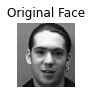

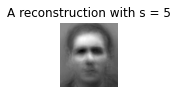

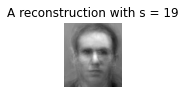

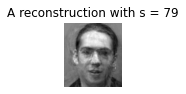

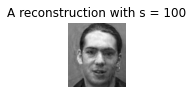

In [8]:
#plot original face and 4 reconstructions of the face
plt.subplot(151)
image = FacialRec()
plt.title("Original Face")
show(image.F[:,100])

plt.subplot(152)
plt.title("A reconstruction with s = 5")
f_hat = image.project(image.shifted, 5)[:,100]
U_s = image.U[:,:5]
show(U_s@f_hat + image.mean)

plt.subplot(153)
plt.title("A reconstruction with s = 19")
f_hat = image.project(image.shifted, 19)[:,100]
U_s = image.U[:,:19]
show(U_s@f_hat + image.mean)

plt.subplot(154)
plt.title("A reconstruction with s = 79")
f_hat = image.project(image.shifted, 79)[:,100]
U_s = image.U[:,:79]
show(U_s@f_hat + image.mean)

plt.subplot(155)
plt.title("A reconstruction with s = 100")
f_hat = image.project(image.shifted, 100)[:,100]
U_s = image.U[:,:100]
show(U_s@f_hat + image.mean)

### Problem 5 
Implement `FacialRec.find_nearest()`.

### Problem 6

- Implement `FacialRec.match()`.
- Generate some random faces with `sample_faces()`, and use `FacialRec.match()` to find the closest match (let $s=38$).
- For each test, display the sample image and its closest match.

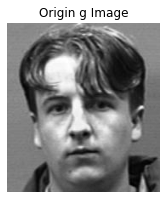

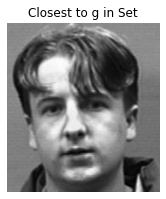

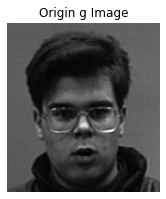

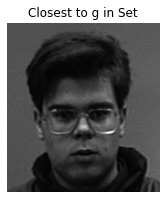

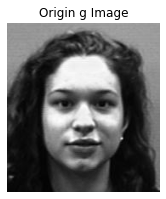

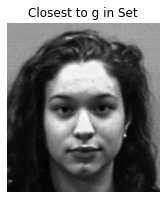

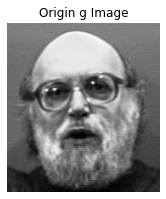

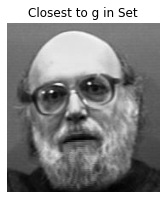

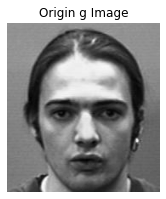

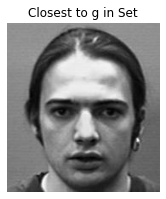

In [9]:
for test_image in sample_faces(5):
    image.match(test_image)